In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('./test_images/nayan1.jpg')
img.shape


(784, 1080, 3)

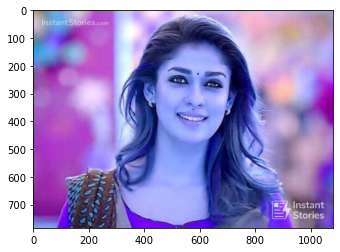

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(784, 1080)

In [9]:
gray.shape

(784, 1080)

In [10]:
gray


array([[150, 149, 148, ..., 175, 175, 175],
       [150, 149, 148, ..., 175, 175, 175],
       [150, 149, 148, ..., 174, 174, 175],
       ...,
       [182, 182, 182, ..., 106, 105, 105],
       [183, 183, 183, ..., 107, 107, 107],
       [184, 184, 184, ..., 108, 108, 108]], dtype=uint8)

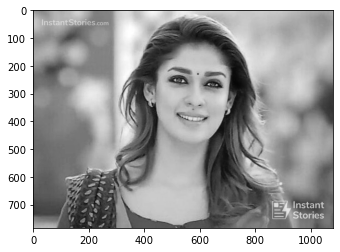

In [11]:
plt.imshow(gray,cmap='gray')

In [12]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[400, 120, 361, 361]], dtype=int32)

In [13]:
(x,y,w,h) = faces[0]
x,y,w,h

(400, 120, 361, 361)

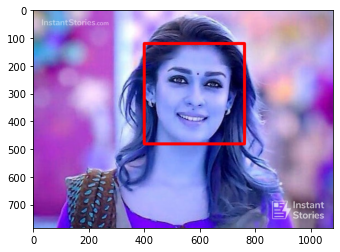

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

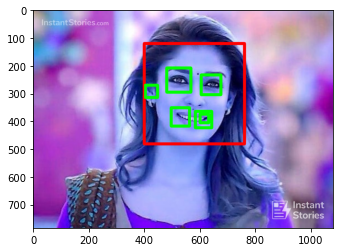

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

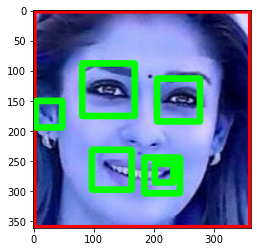

In [16]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [17]:
cropped_img = np.array(roi_color)
cropped_img.shape

(361, 361, 3)

In [18]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

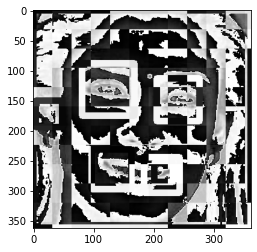

In [19]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

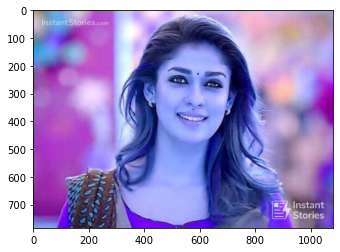

In [22]:
original_image = cv2.imread('./test_images/nayan1.jpg')
plt.imshow(original_image)

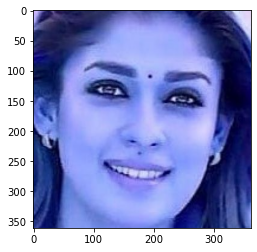

In [23]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/nayan1.jpg')
plt.imshow(cropped_image)

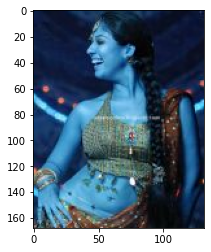

In [27]:
org_image_obstructed = cv2.imread('./test_images/nayan2.jpg')
plt.imshow(org_image_obstructed)

In [47]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/nayan2.jpg')
cropped_image_no_2_eyes

In [48]:
path_to_data = "./model/dataset/"
path_to_cr_data = "./model/dataset/cropped/"

In [49]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [50]:
img_dirs

['./model/dataset/Ajith', './model/dataset/Surya', './model/dataset/vijay']

In [51]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [52]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Ajith
Generating cropped images in folder:  ./model/dataset/cropped/Ajith
Surya
Generating cropped images in folder:  ./model/dataset/cropped/Surya
vijay
Generating cropped images in folder:  ./model/dataset/cropped/vijay
